# Neural Network

## 代码框架
1. 初始化函数--设定输入层节点、隐藏层节点和输出层节点的数量
2. 训练--学习给定的训练集样本后，优化权重
3. 查询--给定输入，给出输入节点给出答案

In [1]:
# neural network class defination
class NeuralNetwork:
    
    # initialise the neural network
    def __init__():
        pass
    
    # train the neural network
    def train():
        pass
    
    # query the neural network
    def query():
        pass

### 1. 初始化网络
设置网络的输入层节点，输出层节点，输出层节点的数量，也就是定义了神经网络的形状和尺寸

In [4]:
# neural network class defination
class NeuralNetwork:
    
    # initialise the neural network
    def __init__(self,inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # learning rate
        self.lr = learningrate
        pass
    
    # train the neural network
    def train():
        pass
    
    # query the neural network
    def query():
        pass

In [6]:
# try to creat a (3,3,3) lr = 0.5 neural network

# number of input, hidden and output nodes
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

# learning rate is 0.5
learning_rate = 0.5

# create instance of neural network
n = NeuralNetwork(inputnodes=input_nodes,hiddennodes=hidden_nodes,
                  outputnodes=output_nodes,learningrate=learning_rate)

## 2. 权重--网络的核心
这里创建网络的链接权重矩阵

- 在输入层与隐藏层之间的链接权重矩阵为 `wih`,其大小为hidden_nodes \* input_nodes
- 在隐藏层与输出层之间的链接权重矩阵为 `who`,其大小为hidden_nodes \* output_nodes

In [193]:
import numpy as np
import scipy.special

# neural network class defination
class NeuralNetwork:
    
    # initialise the neural network
    def __init__(self,inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # learning rate
        self.lr = learningrate
        
        # link weight matrices, wih and who
        # weight inside the array are w_i_j, where link is from node
        # i to node j in the next layer
        # w11 w21
        # w12 w22 etc
#         self.wih = (np.random.rand(self.hnodes, self.inodes)-0.5)
#         self.who = (np.random.rand(self.hnodes, self.inodes)-0.5)
        
        # 设置矩阵wih,who初始随机权重
        self.wih = np.random.normal(0.0, pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes,-0.5),(self.onodes,self.hnodes)) #h,o,有问题
        
        # activation fuction is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    # train the neural network
    # 训练任务分为两个部分：
        # 1.针对给定的训练计算输出，这部份和query部份一样
        # 2.将计算得到的输出与所需输出对比，使用差值来指导网络权重的更新
    def train(self,inputs_list, targets_list):
        inputs = np.array(inputs_list,ndmin=2).T
        targets = np.array(targets_list,ndmin=2).T
        
        ## PART1
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih,inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        ## PART2
        # error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weight,recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layer
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)),
                                     np.transpose(hidden_outputs))
        # update the weights for the links between the hidden and input layer
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),
                                     np.transpose(inputs))
        pass
    
    # query the neural network
    def query(self,inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list,ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih,inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [36]:
# !wget http://www.pjreddie.com/media/files/mnist_train.csv #60000条
# !wget http://www.pjreddie.com/media/files/mnist_test.csv

---

## 神经网络的手写字符数据实践

本次挑战中，我们将使用手写字符数据集 Digits。该数据集的全称为 [Pen-Based Recognition of Handwritten Digits Data Set](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits)，来源于 UCI 开放数据集网站。

数据集包含由 `1797` 张数字 `0` 到 `9` 的手写字符影像转换后的数字矩阵，目标值是 `0-9`。为了方便，这里直接使用 scikit-learn 提供的 `load_digits` 方法加载该数据集。

### 2.1数据查看

In [43]:
from sklearn import datasets

digits = datasets.load_digits()

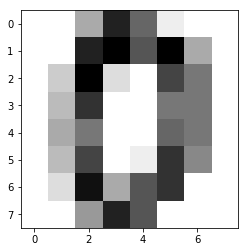

In [45]:
from matplotlib import pyplot as plt
%matplotlib inline

image_array = digits.images[0]
plt.imshow(image_array, cmap=plt.cm.gray_r)

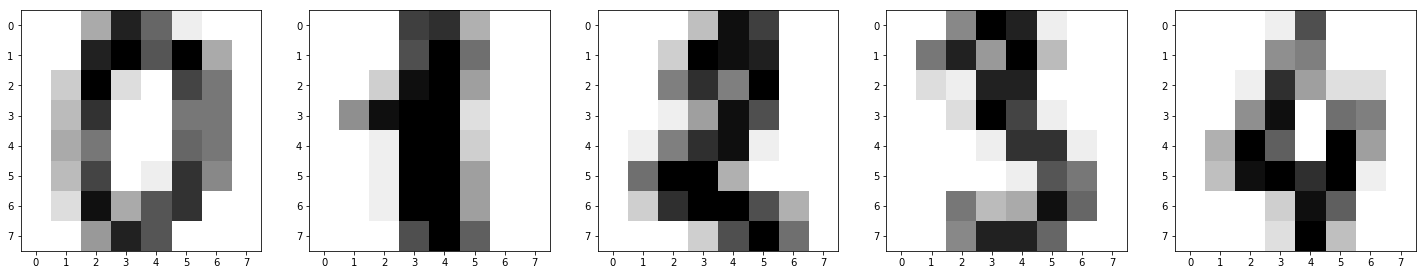

In [83]:
fig,ax = plt.subplots(1,5,figsize=(25,5))
for i in range(0,5):
    image_array = digits.images[i]
    ax[i].imshow(image_array,cmap=plt.cm.gray_r)

In [120]:
# 观察数字矩阵的数字范围
# 思路：每一次，计算最大最小值；放入list;对list里再取最大最小

max_list = []
min_list = []
for i in range(0,1797):
    max_list.append(digits.images[i].max().tolist())
    min_list.append(digits.images[i].min().tolist())

print('数字矩阵数字范围 Max:',max(max_list),'Min:',min(min_list))

数字矩阵数字范围 Max: 16.0 Min: 0.0


### 2.2 数据准备

In [202]:
# 训练数据准备思路：
# 1.输入数据为列向量，将数据矩阵flatten成一维进行输入；
# 2.targets的label是0-9，也就是10个输出选向，于是要转化为一维的[1,0,0,0,0,0,0,0,0,0]来表示0，但还需要用0.01、0.99分别替代0，1
# 因为sigmoid函数是无法达到0，1的


# 数字矩阵scale（input）
# 由观察可知，数据矩阵中的数字范围是0-16，我们scale的目标是 0.01-1.0
scale_data = (digits.data/16*0.99)+0.01


# target
# step1: +0.01
# step2: 对label+0.99
targets1 = np.zeros((digits.target.shape[0],10))+0.01

for i in range(digits.target.shape[0]):
    targets1[i,][digits.target[i]]=0.99

print(scale_data.shape,targets1.shape)

(1797, 64) (1797, 10)


In [203]:
# 生成训练集和测试集 train_test_split() 将数据集切分为 80%（训练集） 和 20%（测试集） 两部分
from sklearn.model_selection import train_test_split
# eg: X_train,X_test, y_train, y_test =train_test_split(train_data,train_target,test_size=0.4, random_state=0)

X_train,X_test, y_train, y_test = train_test_split(scale_data,targets1,test_size=0.2,random_state=30)
print(X_train.shape[0],X_test.shape[0],y_train.shape[0],y_test.shape[0])

1437 360 1437 360


### 2.3 训练数据

In [204]:
# step1:定义神经网络形态

# number of input, hidden and output nodes
input_nodes = 64
hidden_nodes = 30
output_nodes = 10

learning_rate = 0.3

n = NeuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

# step2: training
for i in range(1437):
    n.train(X_train[i],y_train[i])

### 2.4 测试数据

In [225]:
# 思路：用scorecard来记录正确的记录；
# step1: 将y_test转为相应的int
# step2: 将输出的向量转为相应的int
import time
scorecard = []
start_time = time.time()
for i in range(360):
    # correct label
    correct_label = np.argmax(y_test[i])
    
    # test
    output_array = n.query(X_test[i])
    label = np.argmax(output_array)
    
    # append correct label into list
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
end_time = time.time()
during_time = end_time - start_time

print(scorecard,'\nAccuracy:',sum(scorecard)/360,'\nTime:',during_time)

[1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 